## Dataset Loading

In [1]:
# Loading raw data
import pandas as pd
fraud_dataset_path = r"..\src\data\cleaned\processed\ecommerce_fraud_dataset.csv"
df_fraud = pd.read_csv(fraud_dataset_path)

### Exploring the Dataset

In [2]:
df_fraud.head()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,...,freq_count,freq_count_bins,purchase_month,purchase_week,purchase_hour,seconds_since_signup,country_risk_values_x,country_risk_values_y,country_risk_bins,age_bins
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,...,1,1,April,Saturday,2,4506682.0,0.097865,0.097865,High risk,< 40
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,...,1,1,June,Monday,1,17944.0,0.095626,0.095626,High risk,50 - 59
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,...,12,11-15,January,Thursday,18,1.0,0.095626,0.095626,High risk,50 - 59
3,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,...,1,1,September,Wednesday,18,4361461.0,0.095626,0.095626,High risk,40 - 49
4,159135,2015-05-21 06:03:03,2015-07-09 08:05:14,42,ALEYXFXINSXLZ,Ads,Chrome,M,18,2.809315e+09,...,1,1,July,Thursday,8,4240931.0,0.116975,0.116975,High risk,< 40


C:\Users\redie\AppData\Local\Temp\ipykernel_18120\2278376641.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\redie\AppData\Local\Temp\ipykernel_18120\2278376641.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\redie\AppData\Local\Temp\ipykernel_18120\2278376641.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\redie\AppData\Local\Temp\ipykernel_18120\2278376641.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(
C:\Users\redie\AppData\L

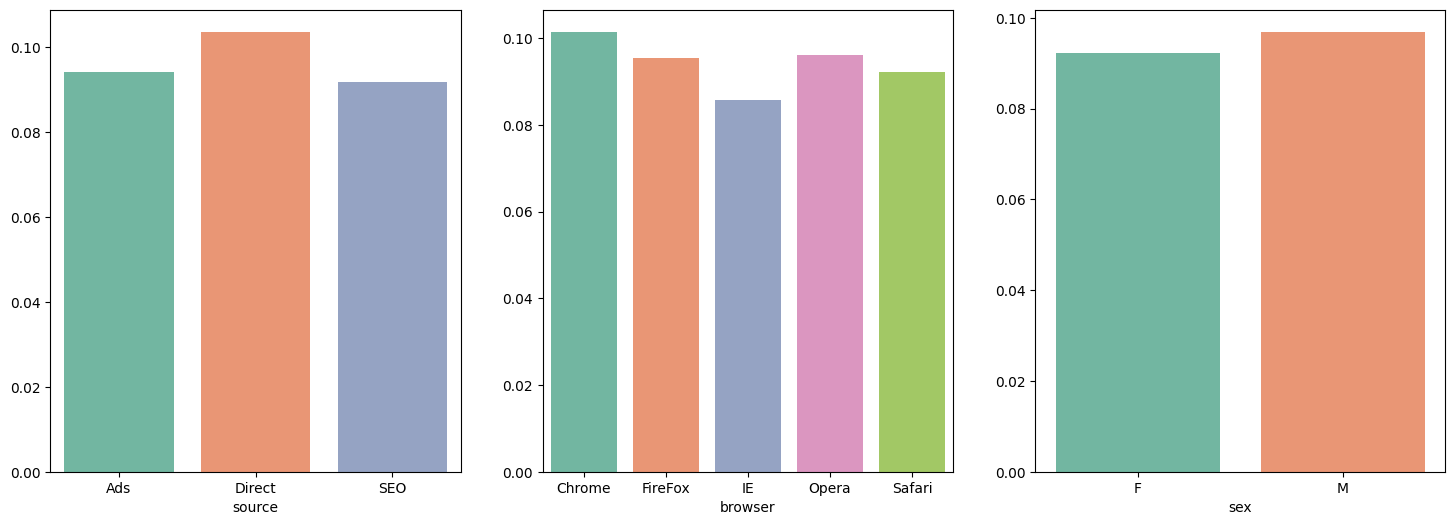

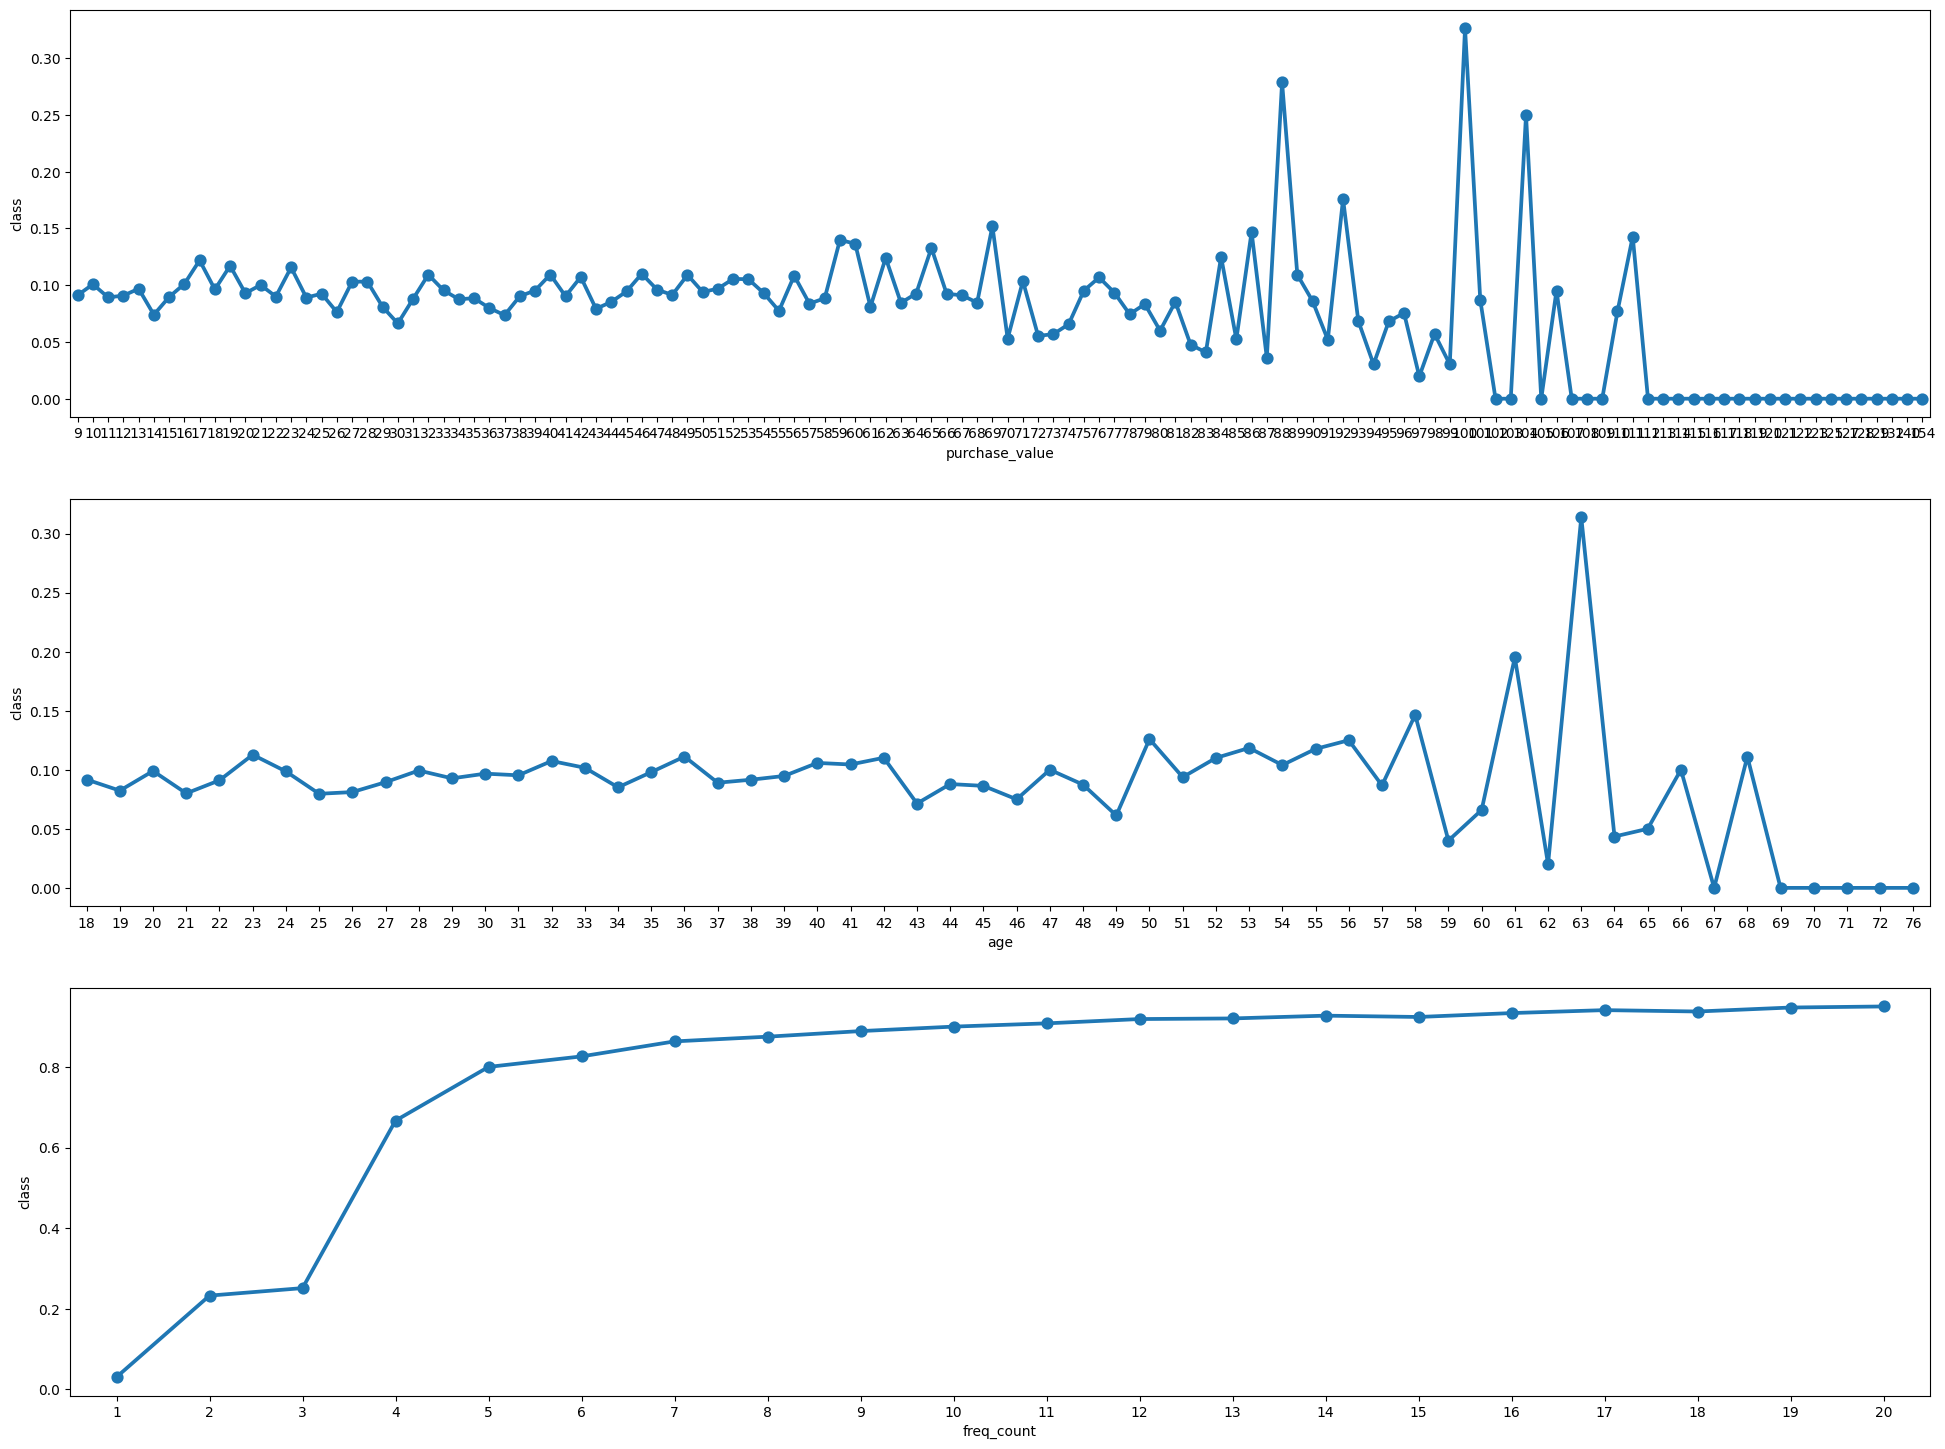

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

f, ax = plt.subplots(1,3,figsize=(18,6))
f1, ax1 = plt.subplots(3,1,figsize=(24,18))

def plot_barcharts(df, col, ax_index):
  class_mean = df.groupby(col)["class"].mean()

  sns.barplot(
      x=class_mean.index,
      y=class_mean.values,
      palette="Set2",
      ax=ax[ax_index]
  )

def point_plot(df, col, ax_index):
  sns.pointplot(
      x=col,
      y="class",
      data=df,
      # logistic=True,
      ci=None,
      ax=ax1[ax_index]
  )

# Barcharts
plot_barcharts(df_fraud, 'source', 0)
plot_barcharts(df_fraud, 'browser', 1)
plot_barcharts(df_fraud, 'sex', 2)

# Pointplots
point_plot(df_fraud, 'purchase_value', 0)
point_plot(df_fraud, 'age', 1)
point_plot(df_fraud, 'freq_count', 2)

Printing class sums


C:\Users\redie\AppData\Local\Temp\ipykernel_18120\3824136539.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\redie\AppData\Local\Temp\ipykernel_18120\3824136539.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


Printing class means


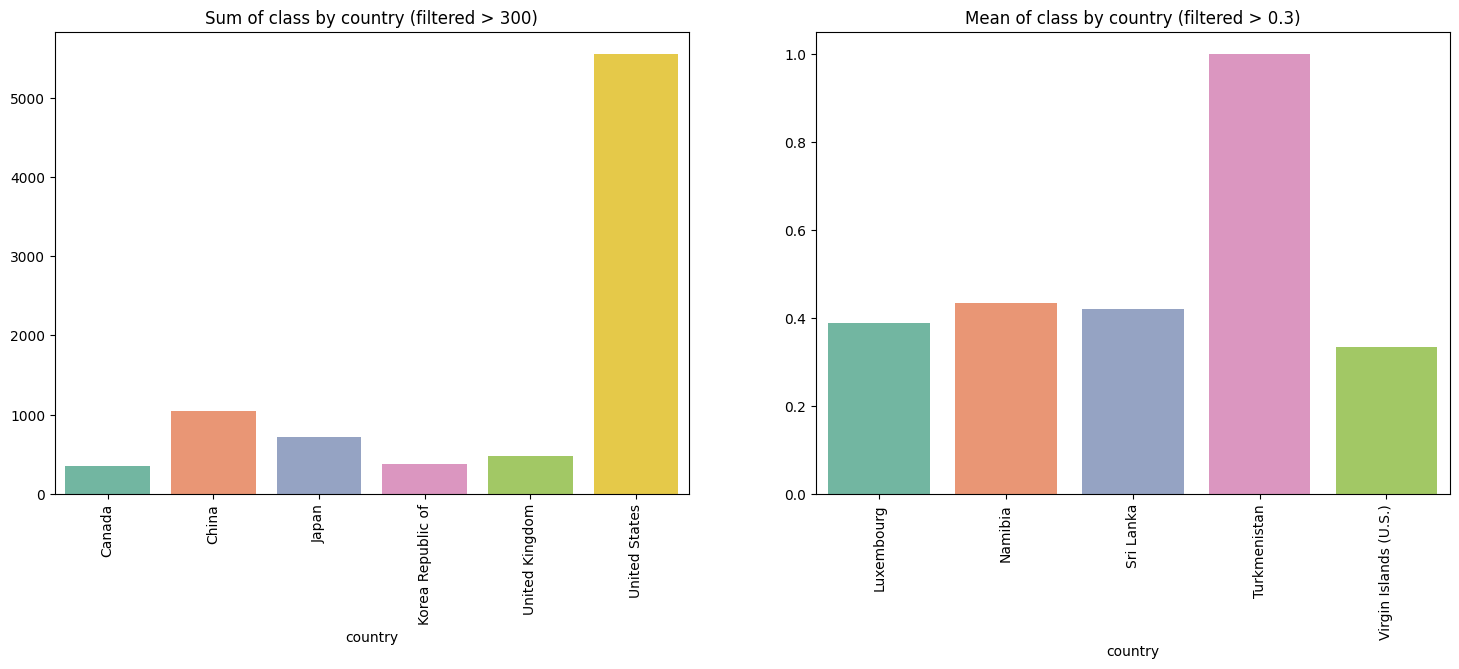

In [5]:
# Overview of Distribution by Country

f, ax = plt.subplots(1,2,figsize=(18,6))

def plot_barcharts_sum(df, col, index):
  class_sum = df.groupby(col, dropna=False)["class"].sum()
  filtered_class_sum = class_sum[class_sum > 300]
  sns.barplot(
      x=filtered_class_sum.index.astype(str),
      y=filtered_class_sum.values,
      palette="Set2",
      ax=ax[index]
  )

  ax[index].set_title(f"Sum of class by {col} (filtered > 300)")
  ax[index].tick_params(axis="x", rotation=90)

def plot_barcharts_mean(df, col, index):
  class_mean = df.groupby(col, dropna=False)["class"].mean()
  filtered_class_mean = class_mean[class_mean > 0.3]

  sns.barplot(
      x=filtered_class_mean.index.astype(str),
      y=filtered_class_mean.values,
      palette="Set2",
      ax=ax[index]
  )

  ax[index].set_title(f"Mean of class by {col} (filtered > 0.3)")
  ax[index].tick_params(axis="x", rotation=90)

print("Printing class sums")
plot_barcharts_sum(df_fraud, 'country', 0)

print("Printing class means")
plot_barcharts_mean(df_fraud, 'country', 1)
